In [ ]:
## Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import Sequential,layers
from keras.layers import Dense,MaxPooling2D,Conv2D,Flatten
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras import layers, Sequential

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d phylake1337/fire-dataset

 96% 370M/387M [00:02<00:00, 213MB/s]
100% 387M/387M [00:02<00:00, 167MB/s]


In [ ]:
## unzip files in colab

import zipfile
zip_ref = zipfile.ZipFile('/content/fire-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()


In [ ]:
## use image datatset load

train_ds = tf.keras.utils.image_dataset_from_directory(
  "/content/fire_dataset",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(200, 200 ),
  batch_size=32)

Found 999 files belonging to 2 classes.
Using 800 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  "/content/fire_dataset",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(200, 200 ),
  batch_size=32)


Found 999 files belonging to 2 classes.
Using 199 files for validation.


In [ ]:
labels = train_ds.class_names
labels


['fire_images', 'non_fire_images']

## Using ANN

In [ ]:
model = tf.keras.Sequential([
    layers.Rescaling(1.0 / 255),
    layers.Flatten(input_shape=(200, 200, 3)),
    layers.Dense(128, activation="relu"),

    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [ ]:
# ANN Model

In [ ]:
# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
num_epochs = 10
history = model.fit(train_ds, epochs=num_epochs, validation_data=val_ds)

Epoch 1/10
25/25 [==============================] - 16s 511ms/step - loss: 0.1226 - accuracy: 0.9675 - val_loss: 0.3836 - val_accuracy: 0.9347
Epoch 2/10
25/25 [==============================] - 23s 537ms/step - loss: 0.5139 - accuracy: 0.9150 - val_loss: 0.5378 - val_accuracy: 0.9196
Epoch 3/10
25/25 [==============================] - 17s 520ms/step - loss: 0.1637 - accuracy: 0.9650 - val_loss: 0.5368 - val_accuracy: 0.9146
Epoch 4/10
25/25 [==============================] - 15s 465ms/step - loss: 0.0634 - accuracy: 0.9825 - val_loss: 0.5787 - val_accuracy: 0.9146
Epoch 5/10
25/25 [==============================] - 16s 508ms/step - loss: 0.1243 - accuracy: 0.9663 - val_loss: 0.4797 - val_accuracy: 0.9146
Epoch 6/10
25/25 [==============================] - 19s 571ms/step - loss: 0.1710 - accuracy: 0.9625 - val_loss: 0.4292 - val_accuracy: 0.9246
Epoch 7/10
25/25 [==============================] - 16s 496ms/step - loss: 0.3423 - accuracy: 0.9337 - val_loss: 1.4085 - val_accuracy: 0.8342

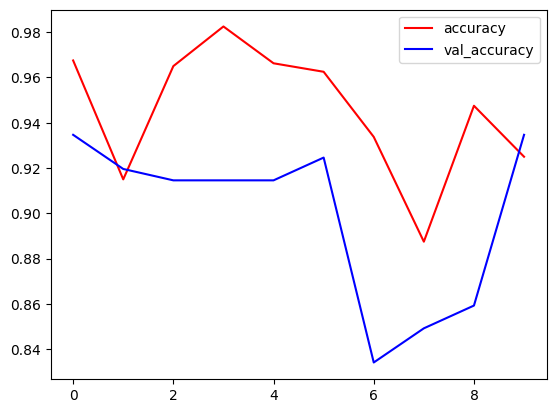

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"],color="red",label="accuracy")
plt.plot(history.history["val_accuracy"],color="blue",label="val_accuracy")
plt.legend()

In [ ]:
import joblib

# Save the trained model
joblib.dump(model, 'cnn_model.pkl')


# Load the trained model
loaded_model = joblib.load('cnn_model.pkl')

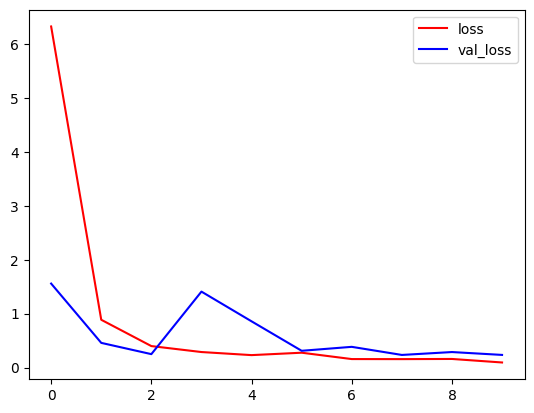

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"],color="red",label="loss")
plt.plot(history.history["val_loss"],color="blue",label="val_loss")
plt.legend()

In [ ]:
import cv2
image=cv2.imread("/content/fire_dataset/non_fire_images/non_fire.123.png")

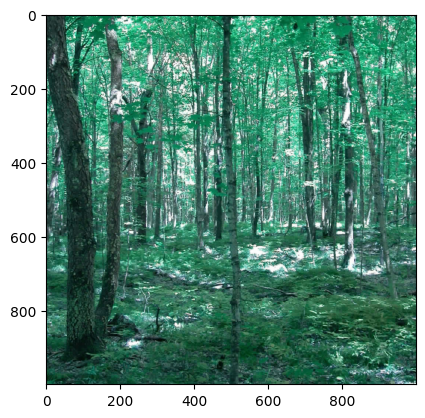

In [ ]:
plt.imshow(image)

In [ ]:
img=cv2.resize(image,(200,200))
test_image=img.reshape(1,200,200,3)

In [ ]:
# Make a prediction using the model
import numpy as np
predictions = model.predict(test_image)

# # Find the index of the maximum predicted value
predicted_class_index = max(predictions)

threshold=0.5
pred="fire" if predicted_class_index<=threshold else "non_fire"
# predicted_class_label = class_labels[predicted_class_index]

print("Predicted class:",  pred )

1/1 [==============================] - 0s 100ms/step
Predicted class: non_fire


## Using Droput layer and batch normalization

In [ ]:
model = tf.keras.Sequential([
    layers.Rescaling(1.0 / 255),
    layers.Flatten(input_shape=(200, 200, 3)),
    layers.Dense(128, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(64, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

In [ ]:
model.compile(optimizer = "adam", loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
num_epochs = 10
history = model.fit(train_ds, epochs=num_epochs, validation_data=val_ds)

Epoch 1/10
25/25 [==============================] - 17s 403ms/step - loss: 0.7355 - accuracy: 0.6488 - val_loss: 1.7393 - val_accuracy: 0.7588
Epoch 2/10
25/25 [==============================] - 15s 457ms/step - loss: 0.5768 - accuracy: 0.7287 - val_loss: 0.8962 - val_accuracy: 0.7839
Epoch 3/10
25/25 [==============================] - 16s 463ms/step - loss: 0.4555 - accuracy: 0.8075 - val_loss: 0.6650 - val_accuracy: 0.7889
Epoch 4/10
25/25 [==============================] - 18s 603ms/step - loss: 0.4326 - accuracy: 0.8150 - val_loss: 0.3826 - val_accuracy: 0.8643
Epoch 5/10
25/25 [==============================] - 31s 1s/step - loss: 0.3638 - accuracy: 0.8450 - val_loss: 0.5568 - val_accuracy: 0.8141
Epoch 6/10
25/25 [==============================] - 21s 493ms/step - loss: 0.3280 - accuracy: 0.8587 - val_loss: 0.2216 - val_accuracy: 0.9497
Epoch 7/10
25/25 [==============================] - 19s 637ms/step - loss: 0.2912 - accuracy: 0.8988 - val_loss: 0.2481 - val_accuracy: 0.9246
Ep

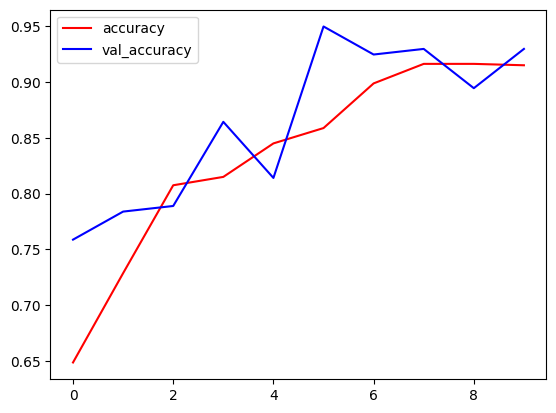

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"],color="red",label="accuracy")
plt.plot(history.history["val_accuracy"],color="blue",label="val_accuracy")
plt.legend()

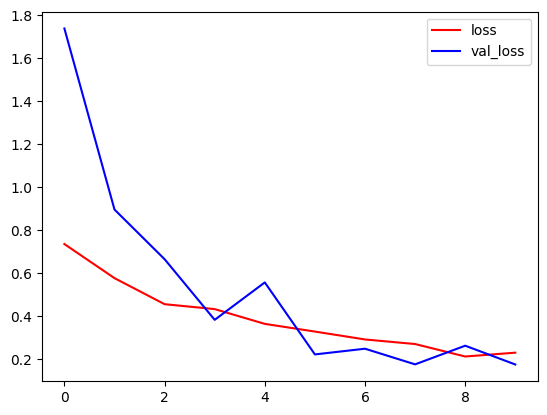

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"],color="red",label="loss")
plt.plot(history.history["val_loss"],color="blue",label="val_loss")
plt.legend()

## Using Alexnet Architecture

In [ ]:
## use image datatset load

train_ds = tf.keras.utils.image_dataset_from_directory(
  "/content/fire_dataset",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(227, 227 ),
  batch_size=32)

Found 999 files belonging to 2 classes.
Using 800 files for training.


In [ ]:
## use image datatset load

val_ds = tf.keras.utils.image_dataset_from_directory(
  "/content/fire_dataset",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(227, 227 ),
  batch_size=32)

Found 999 files belonging to 2 classes.
Using 800 files for training.


In [ ]:

# Define the AlexNet model
model = Sequential([
    layers.Rescaling(1.0 / 255),
    layers.Conv2D(96, kernel_size=(11, 11), strides=4, padding='valid', activation="relu", input_shape=(227, 227, 3)),
    layers.MaxPool2D(pool_size=(3, 3), strides=2, padding="valid"),

    layers.Conv2D(256, kernel_size=(5, 5), strides=1, padding='valid', activation="relu"),
    layers.MaxPool2D(pool_size=(3, 3), strides=2, padding="valid"),

    layers.Conv2D(384, kernel_size=(3, 3), strides=1, padding='same', activation="relu"),
    layers.Conv2D(384, kernel_size=(3, 3), strides=1, padding='same', activation="relu"),
    layers.Conv2D(256, kernel_size=(3, 3), strides=1, padding='same', activation="relu"),

    layers.MaxPool2D(pool_size=(3, 3), strides=2, padding="valid"),

    layers.Dropout(0.5),

    layers.Flatten(),
    layers.Dense(4096, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(4096, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
num_epochs = 10
history = model.fit(train_ds, epochs=num_epochs, validation_data=val_ds)

Epoch 1/10
25/25 [==============================] - 34s 899ms/step - loss: 0.7838 - accuracy: 0.7350 - val_loss: 0.4515 - val_accuracy: 0.7563
Epoch 2/10
25/25 [==============================] - 26s 878ms/step - loss: 0.4068 - accuracy: 0.7563 - val_loss: 0.3862 - val_accuracy: 0.7563
Epoch 3/10
25/25 [==============================] - 25s 880ms/step - loss: 0.4858 - accuracy: 0.7563 - val_loss: 0.4539 - val_accuracy: 0.7563
Epoch 4/10
25/25 [==============================] - 25s 876ms/step - loss: 0.3638 - accuracy: 0.7613 - val_loss: 0.4482 - val_accuracy: 0.7088
Epoch 5/10
25/25 [==============================] - 25s 837ms/step - loss: 0.4010 - accuracy: 0.7538 - val_loss: 0.3491 - val_accuracy: 0.7563
Epoch 6/10
25/25 [==============================] - 25s 844ms/step - loss: 0.5814 - accuracy: 0.7437 - val_loss: 0.5191 - val_accuracy: 0.7563
Epoch 7/10
25/25 [==============================] - 26s 917ms/step - loss: 0.4787 - accuracy: 0.7563 - val_loss: 0.3970 - val_accuracy: 0.7563

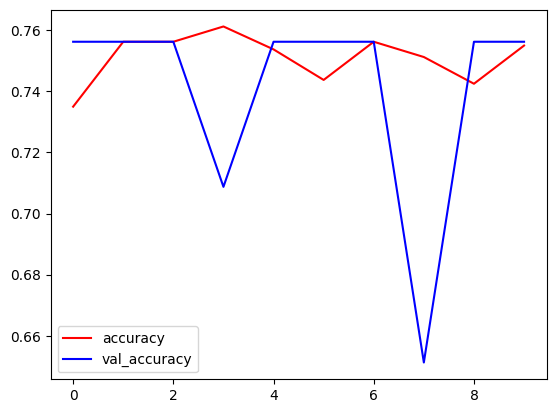

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"],color="red",label="accuracy")
plt.plot(history.history["val_accuracy"],color="blue",label="val_accuracy")
plt.legend()

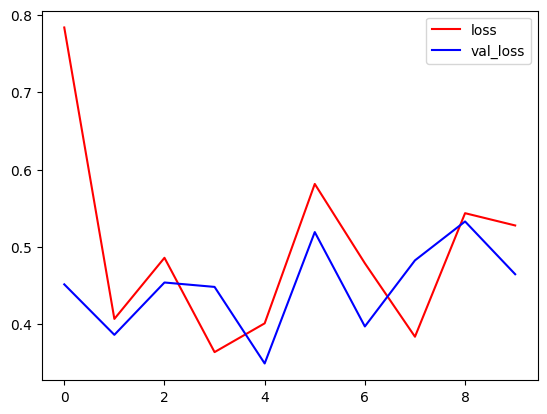

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"],color="red",label="loss")
plt.plot(history.history["val_loss"],color="blue",label="val_loss")
plt.legend()